# 실루엣 분석
- 비지도학습의 특성상 성능을 평가하는 것은 어렵다.
- 각 군집 간의 거리가 얼마나 효율적으로 분리돼 있는지를 나타냄
- 다른 군집과의 거리는 떨어져 있고, 동일 군집끼리의 데이터는 서로 가깝게 잘 뭉쳐 있어야 한다.

## 실루엣 계수
$$s(i) = \frac{(b(i) - a(i))}{(max(a(i),b(i)))}$$
a(i) : 해당 데이터 포인트와 같은 군집 내에 있는 다른 데이터 포인트와의 거리의 평균

b(i) : 해당 데이터 포인트가 속하지 않은 군집 중 가장 가까운 군집과의 평균 거리

- 분모는 정규화
- -1에서 1 사이의 값을 가지며, 1에 가까워질수록 근처의 군집과 더 멀리, 0에 가까울수록 근처의 군집과 가까워짐
![image](https://www.researchgate.net/profile/Mark_Stamp/publication/272017073/figure/fig2/AS:367168605704193@1464551225139/Silhouette-coefficient-example.png)
- 개별 데이터가 가지는 군집화 지표

## 좋은 군집화
- 전체 실루엣 계수의 평균값이 0~1 사이의 값을 가지며, 1에 가까울수록 좋음
- 전체 실루엣 계수의 평균값과 더불어 개별 군집의 평균값의 편차가 크지 않아야 한다
- 개별 군집의 실루엣 계수 평균값이 전체 실루엣 계수의 평균값에서 크게 벗어나지 않도록

# sklearn 실루엣 계수

##### sklearn.metrics.silhouette_samples(X, labels, metric = 'euclidean',)
X feature 데이터 세트와 각 피처 데이터 세트가 속한 label데이터를 입력하면, 각 데이터 포인트의 실루엣 계수를 반환
##### sklearn.metrics.silhouette_score(X, labels, metric = 'euclidean',)
전체 데이터의 실루엣 계수 값을 평균해 반환. 이 값이 높을수록 군집화가 잘 되었다.

## iris data example

In [2]:
from sklearn.preprocessing import scale
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [4]:
iris = load_iris()
feature_names = ['sepal_length','sepal_wdith','petal_legnth', 'petal_width']

iris_df = pd.DataFrame(data = iris.data, columns = feature_names)
kmeans = KMeans(n_clusters = 3, max_iter = 300, random_state = 0).fit(iris_df)

iris_df['cluster'] = kmeans.labels_

In [7]:
iris_df.shape

(150, 5)

In [5]:
score_samples = silhouette_samples(iris.data, iris_df['cluster'])
#모든 데이터의 실루엣 계수
score_samples.shape

(150,)

In [9]:
iris_df['silhouette_coef'] = score_samples
average_score = silhouette_score(iris.data, iris_df['cluster'])

print('iris data의 Silhouette Analysis Score : {0:.3f}'.format(average_score))

iris data의 Silhouette Analysis Score : 0.553


In [12]:
#군집별로 실루엣 계수의 편차가 있다.
iris_df.groupby('cluster')['silhouette_coef'].mean()

cluster
0    0.417320
1    0.798140
2    0.451105
Name: silhouette_coef, dtype: float64

# visualize silhouette analysis

In [17]:
import matplotlib.cm as cm

In [18]:
#X_feature와 클러스터 개수를 입력하면, KMeans 알고리즘 수행 후, visaulize
def visualize_silhouette(cluster_lists, X_features) :
    
    #클러스터링할 군집의 개수를 리스트로 받아서, 각 개숫별로 클러스터링을 하고, 실루엣 계수를 구함
    n_cols = len(cluster_lists)
    
    fig, axs = plt.subplots(figsize = (4*n_cols, 4), nrows = 1, ncols = n_cols)
    
    for ind, n_cluster in enumerate(cluster_lists) :
        
        clusterer = KMeans(n_clusters = n_cluster, max_iter = 500, random_state = 0)
        cluster_labels = clusterer.fit_predict(X_features)
        
        sil_avg = silhouette_score(X_features, cluster_labels)
        sil_values = silhouette_samples(X_features, cluster_labels)
        
        y_lower = 10
        axs[ind].set_title('Number of Cluster : ' + str(n_cluster) + '\n' \
                          'Silhouette Score : ' + str(round(sil_avg,3)))
        axs[ind].set_xlabel("The silhouette coefficient values")
        axs[ind].set_ylabel("Cluster label")
        axs[ind].set_xlim([-0.1, 1])
        axs[ind].set_ylim([0, len(X_features) + (n_cluster + 1) * 10])
        axs[ind].set_yticks([])  # Clear the yaxis labels / ticks
        axs[ind].set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1])
        
        # 클러스터링 갯수별로 fill_betweenx( )형태의 막대 그래프 표현. 
        for i in range(n_cluster):
            ith_cluster_sil_values = sil_values[cluster_labels==i]
            ith_cluster_sil_values.sort()
            
            size_cluster_i = ith_cluster_sil_values.shape[0]
            y_upper = y_lower + size_cluster_i
            
            color = cm.nipy_spectral(float(i) / n_cluster)
            axs[ind].fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_sil_values, \
                                facecolor=color, edgecolor=color, alpha=0.7)
            axs[ind].text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
            y_lower = y_upper + 10
            
        axs[ind].axvline(x=sil_avg, color="red", linestyle="--")

## make_blobs

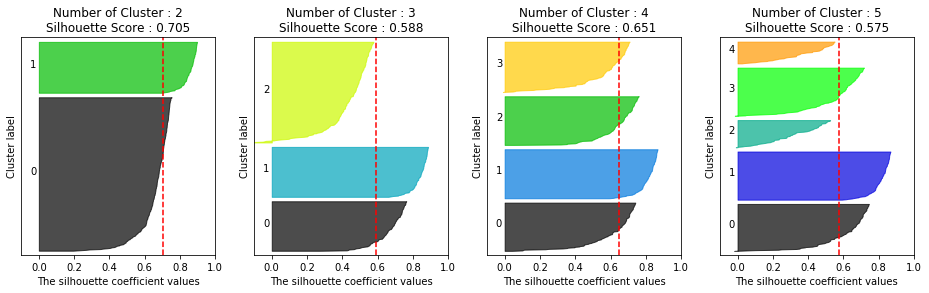

In [19]:
from sklearn.datasets import make_blobs
X,y = make_blobs(n_samples = 500, n_features=2, centers = 4, cluster_std = 1,
                center_box = (-10,10), shuffle=True, random_state = 1)

visualize_silhouette([2,3,4,5],X)

cluster의 개수가 4개일 때, 가장 최적
전체 평균에서 많이 차이나는 그룹이 없다

## iris data

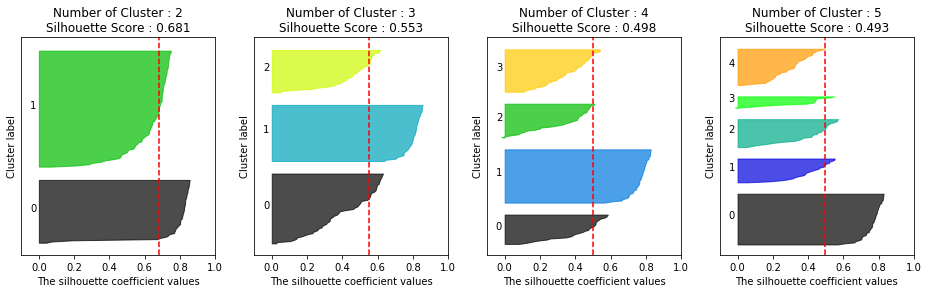

In [20]:
visualize_silhouette([2,3,4,5], iris.data)